In [1]:
import nltk
import re
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [3]:
len(messages)

5574

In [4]:
print(enumerate(messages[:1]))

In [5]:
for num, message in enumerate(messages[:5]):
    print(num, message)
#    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though


In [6]:
type(messages)

list

In [7]:
type(enumerate(messages[:5]))

enumerate

In [8]:
for num, message in enumerate(messages[:5],10):
    print(num, message)

10 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
11 ham	Ok lar... Joking wif u oni...
12 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
13 ham	U dun say so early hor... U c already then say...
14 ham	Nah I don't think he goes to usf, he lives around here though


In [9]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep ='\t', names=['labels', 'message'])

In [10]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
labels     5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [13]:
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [14]:
messages['length'] = messages['message'].apply(len)

In [15]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


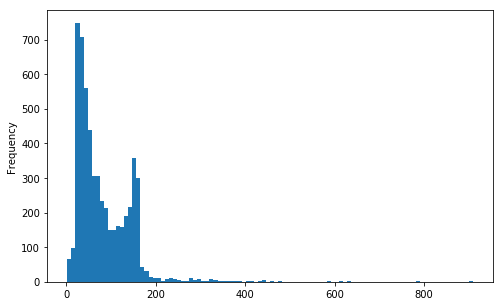

In [16]:
plt.figure(figsize=(8,5))
messages['length'].plot(kind='hist', bins=100)

In [17]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

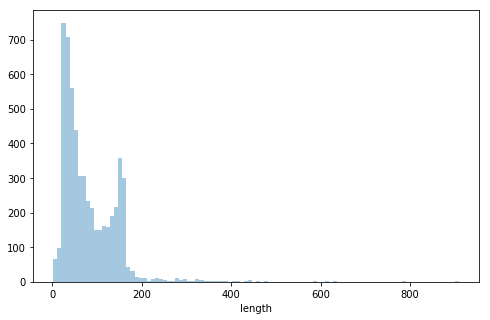

In [19]:
plt.figure(figsize=(8,5))
sns.distplot(messages['length'], bins = 100, kde=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f25df9ba780>,
      dtype=object)

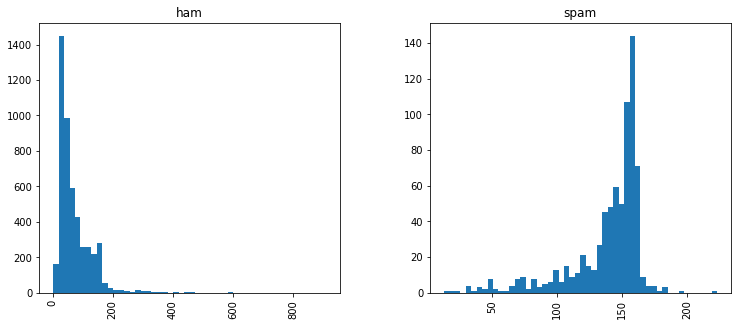

In [20]:
messages.hist(column='length', by='labels', bins=50, figsize=(12,5))

In [21]:
import string

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
mess = 'Sample message ! Notice : it has punct'

In [24]:
noun = [car for car in mess if car not in string.punctuation]
print(noun )

['S', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', ' ', 'i', 't', ' ', 'h', 'a', 's', ' ', 'p', 'u', 'n', 'c', 't']


In [25]:
''.join(noun)

'Sample message  Notice  it has punct'

In [26]:
from nltk.corpus import stopwords
stopwords.words('english')[:3]

['i', 'me', 'my']

In [27]:
import string
from nltk.tokenize import RegexpTokenizer
token1 = RegexpTokenizer(r'[a-zA-Z]+' r'\w{1,}')
def text_process(mess):
    # Remove punc
    # Remove stop words
    
    nopunc = re.sub(",", '', ''.join(mess))
    nopunc = [char for char in nopunc.split() if char.lower() not in stopwords.words('english')]
    nopunc = [char for char in nopunc if char not in string.punctuation] 
    
    
    #nopunc = [char for char in mess if char not in string.punctuation] 
    #nopunc = ''.join(nopunc)
    #nopunc = [char for char in nopunc.split() if char.lower() not in stopwords.words('english')]
    
  
    
    return ' '.join(token1.tokenize(' '.join(nopunc)))

In [28]:
from nltk.tokenize import RegexpTokenizer
# to remove symbol and numbers
token = RegexpTokenizer(r'[a-zA-Z]+' r'\w{0,}'  r"[\w']+")
token.tokenize("1 i can't 100 1 9 . ! we are not 1")

["can't", 'we', 'are', 'not']

In [29]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
messages['message'].head().apply(text_process)

0    Go jurong point crazy Available bugis great wo...
1                                Ok lar Joking wif oni
2    Free entry wkly comp win FA Cup final tkts st ...
3                        dun say early hor already say
4               Nah think goes usf lives around though
Name: message, dtype: object

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
bow_transformer = CountVectorizer(stop_words='english',ngram_range=(1,2),analyzer= 'word',
                             max_df=1.0,min_df=1,max_features=None)

In [33]:
messages['message'] = messages['message'].apply(text_process)

In [34]:
messages['message'][0:1]

0    Go jurong point crazy Available bugis great wo...
Name: message, dtype: object

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages['message'] , messages['labels'], test_size=0.2, random_state=42)

In [85]:
pd.value_counts(messages['labels'])

ham     4825
spam     747
Name: labels, dtype: int64

In [89]:
print('null accuracy is: ', (100- 747/(4825+747)*100))

null accuracy is:  86.59368269921033


In [36]:
message_bow = bow_transformer.fit(X_train)

In [37]:
X_train = message_bow.transform(X_train)
X_test = message_bow.transform(X_test)

In [38]:
print(X_train.shape)
print(X_test.shape)

(4457, 29150)
(1115, 29150)


In [39]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
model1 = MultinomialNB(alpha=0.01).fit(X_train, y_train)

In [79]:
predictions = model1.predict(X_test)

In [42]:
print(predictions)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

        ham       0.99      0.99      0.99       964
       spam       0.95      0.94      0.95       151

avg / total       0.99      0.99      0.99      1115



In [81]:
a= text_process(["save upto 40% in this offer"])
a = bow_transformer.transform([a])
model1.predict(a)

array(['spam'], dtype='<U4')

In [46]:
from sklearn.svm import LinearSVC

In [72]:
model2 = LinearSVC(C=0.01).fit(X_train, y_train)

In [73]:
predictions2 = model2.predict(X_test)

In [74]:
print(classification_report(predictions2, y_test))

             precision    recall  f1-score   support

        ham       1.00      0.97      0.99       993
       spam       0.82      1.00      0.90       122

avg / total       0.98      0.98      0.98      1115



In [75]:
pd.value_counts(y_test)

ham     966
spam    149
Name: labels, dtype: int64

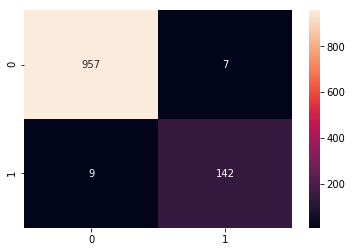

In [83]:
sns.heatmap(confusion_matrix(predictions, y_test), annot=True, fmt='d')